In [112]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn

warnings.filterwarnings("ignore")


In [114]:
df=pd.read_csv("D:\\music\\archive\\heart.csv")
# Reading the csv file (comma separated file)

In [115]:
df
# This is dataframe in data science language

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [116]:
df.info()
# for getting the information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [117]:
df.describe()
#getting the statistics about the attributes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [118]:
df.isnull()
# To make boolean matrix and identify whether each data is null or not

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [119]:
df.isnull().sum()
# To count the null values present in each attribute

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [120]:
df.columns
# way to get entire set of attributes

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [121]:
df.shape

(1025, 14)

In [122]:
df.ndim
# getting the dimension of dataset

2

In [123]:
# As data is already cleaned there is no need for data cleaning

In [124]:
# All the attributes are continuous 

# Checking whether the data is imbalance or not

# Understanding data by visualisation

In [125]:
label=['female','male']

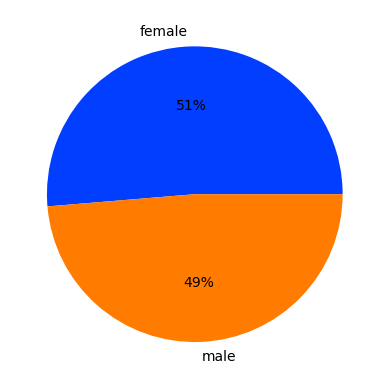

In [126]:
plt.pie(x=df['target'].value_counts(),labels=label,colors = sns.color_palette('bright')[0:2],autopct='%.0f%%')
plt.show()

In [127]:
# The distribution is comparable i..e the dataset is baalnced ==> NO need of Data Balancing

<AxesSubplot:xlabel='age', ylabel='Count'>

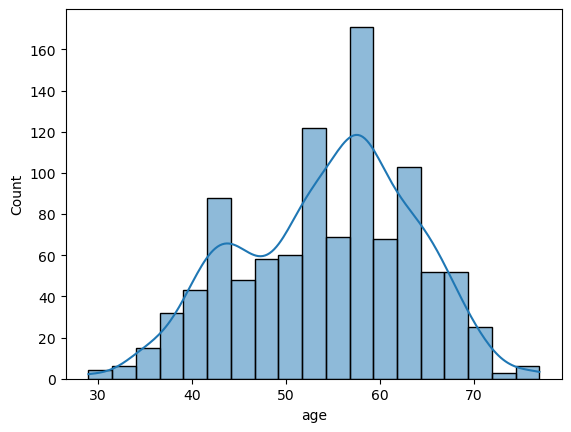

In [128]:
sns.histplot(df['age'],kde=True)

# What we can infer:- 
    (i) Data is bimodal as two peak we can see here
    (ii)Most of the patients are from old age where age approximately 57-58

In [129]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [130]:
bardf=df['cp'].value_counts().to_frame()
bardf=bardf.rename({'cp':'frequency'}, axis='columns')
bardf

,frequency
0,497
2,284
1,167
3,77


Text(0.5, 1.0, 'barplot')

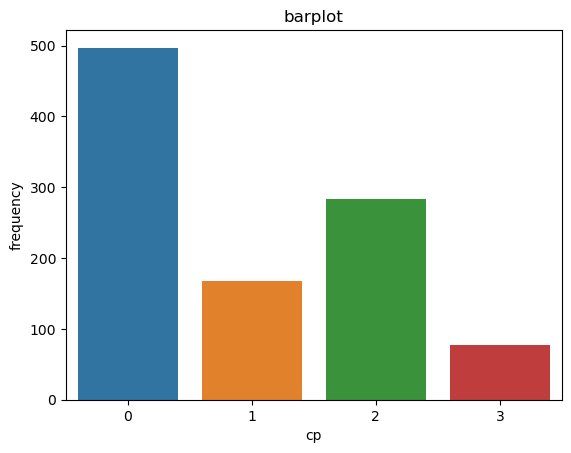

In [131]:
sns.barplot(x=bardf.index,y='frequency',data=bardf)
plt.xlabel('cp')
plt.ylabel('frequency')
plt.title('barplot')
# # 
# # cp-- chest pain type
# # 1 = typical angina
# 2 = atypical angina
# 3 = non — anginal pain
# 4 = asymptotic
# # 

# infer:-
#     most of the patient was having typical angina 

<AxesSubplot:xlabel='sex', ylabel='count'>

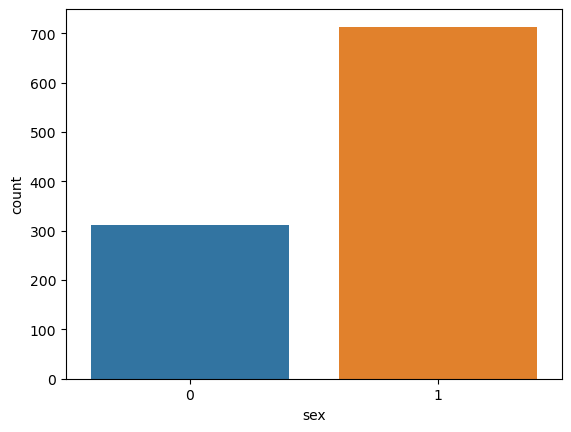

In [132]:
sns.countplot(x='sex',data=df)
# 1 = male
# 0 = female

# It shows the distribution of gender taken into account for this experiment

In [133]:
cols=['age','sex','cp','trestbps','chol']

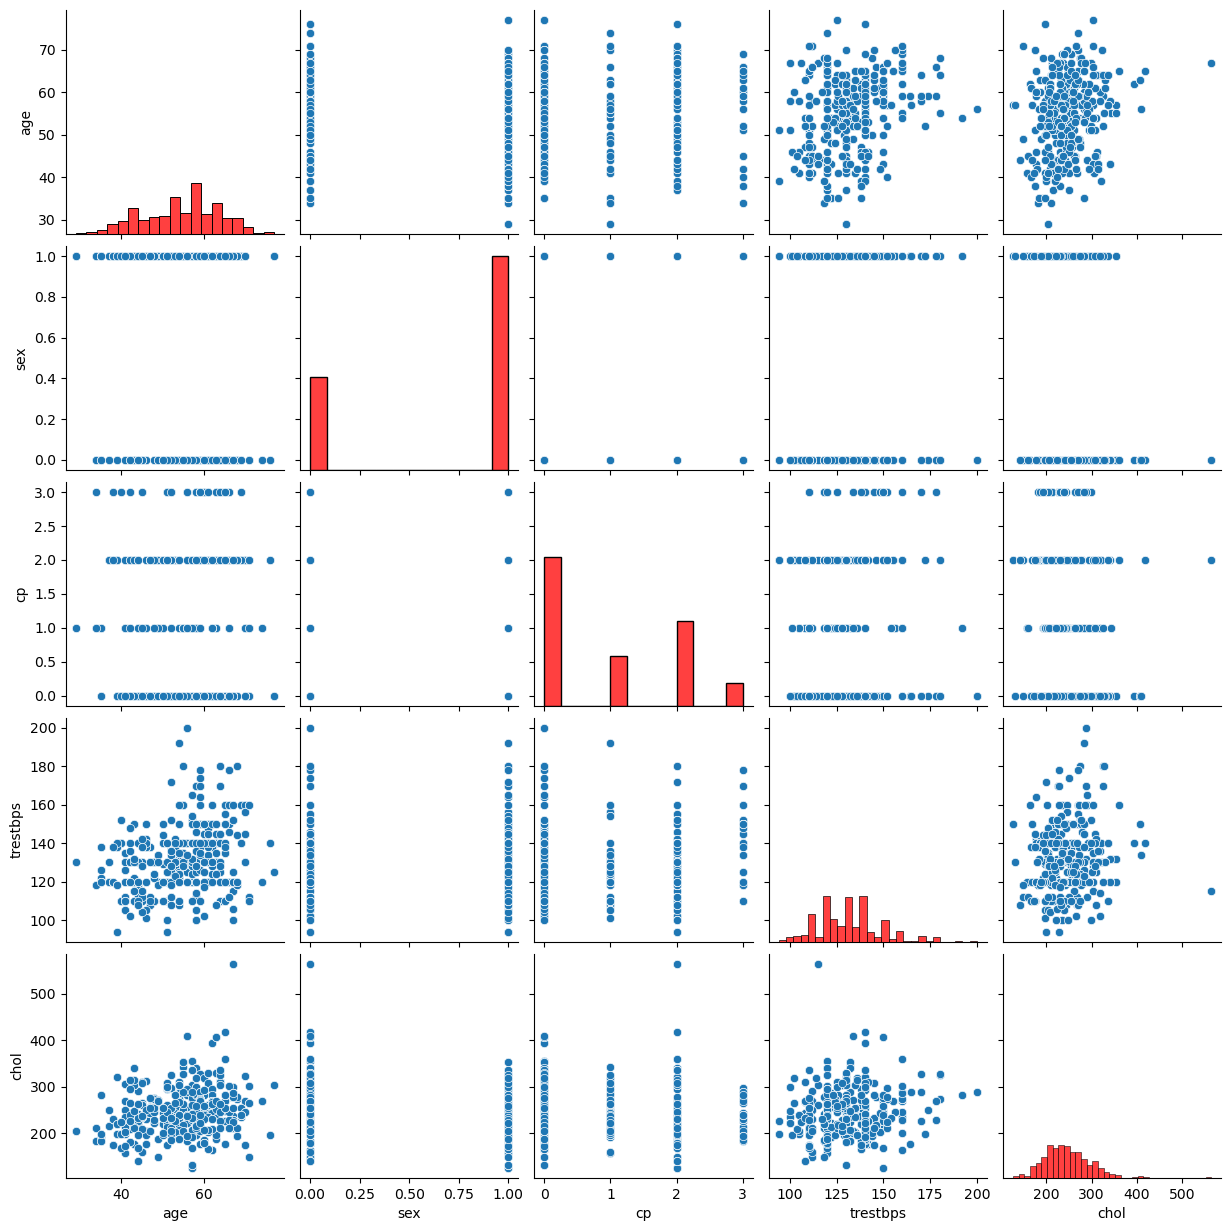

In [134]:
sns.pairplot(data=df[cols],diag_kws={'color':'red'})#plot_kws={'color':'green'}

In [135]:
# #plot_kws is used to style the points
# while diag_kws is used for diagonal styling

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

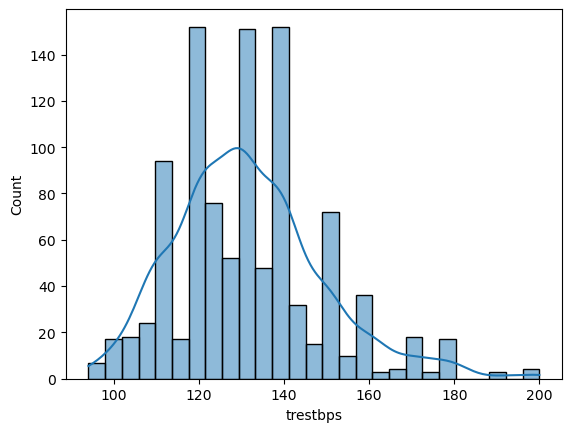

In [136]:
sns.histplot(df['trestbps'],kde=True)

In [137]:
df['trestbps'].mean()

131.61170731707318

In [138]:
# Mean value is 131.611 and this distribution is positively skewed.

<AxesSubplot:xlabel='chol', ylabel='Count'>

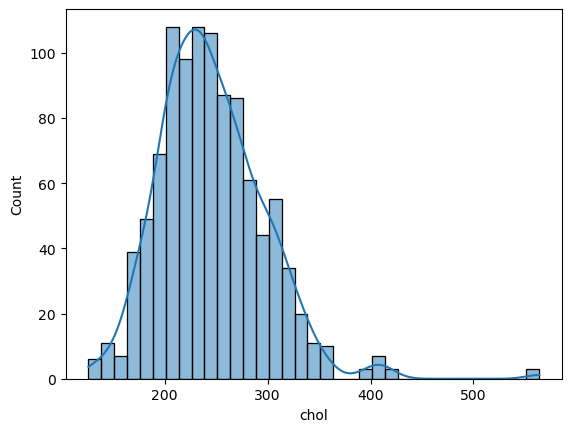

In [139]:
sns.histplot(df['chol'],kde=True)

In [140]:
df['chol'].describe()

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

<AxesSubplot:xlabel='thalach'>

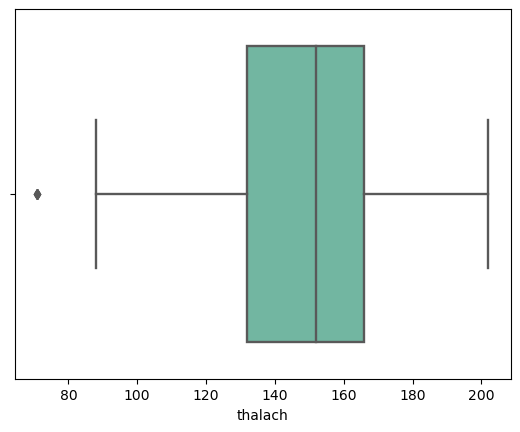

In [141]:
sns.boxplot(x=df['thalach'],palette="Set2",linewidth=1.7)

In [142]:
label=['unsloping','flat','downsloping']

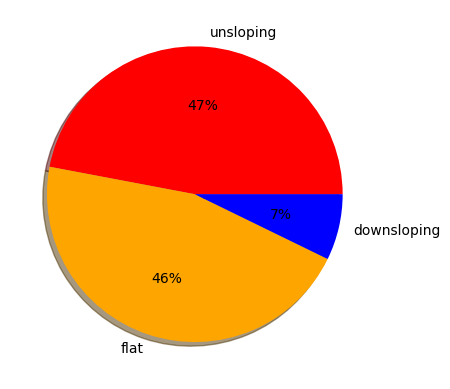

In [143]:
plt.pie(x=df['slope'].value_counts(),labels=label,autopct='%.0f%%',shadow=True,colors=['red','orange','blue'])
plt.show()

<AxesSubplot:xlabel='age', ylabel='target'>

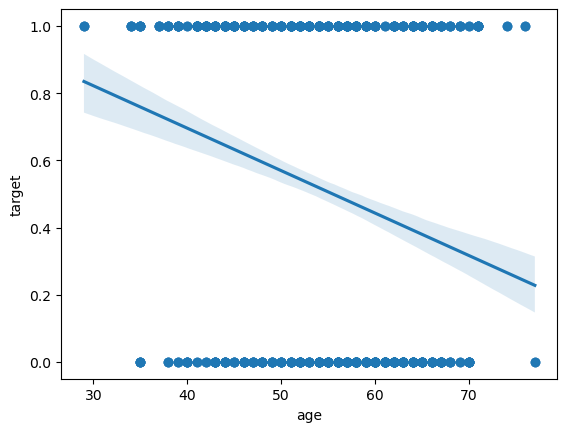

In [144]:
sns.regplot(x='age',y='target',data=df)

In [145]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<AxesSubplot:>

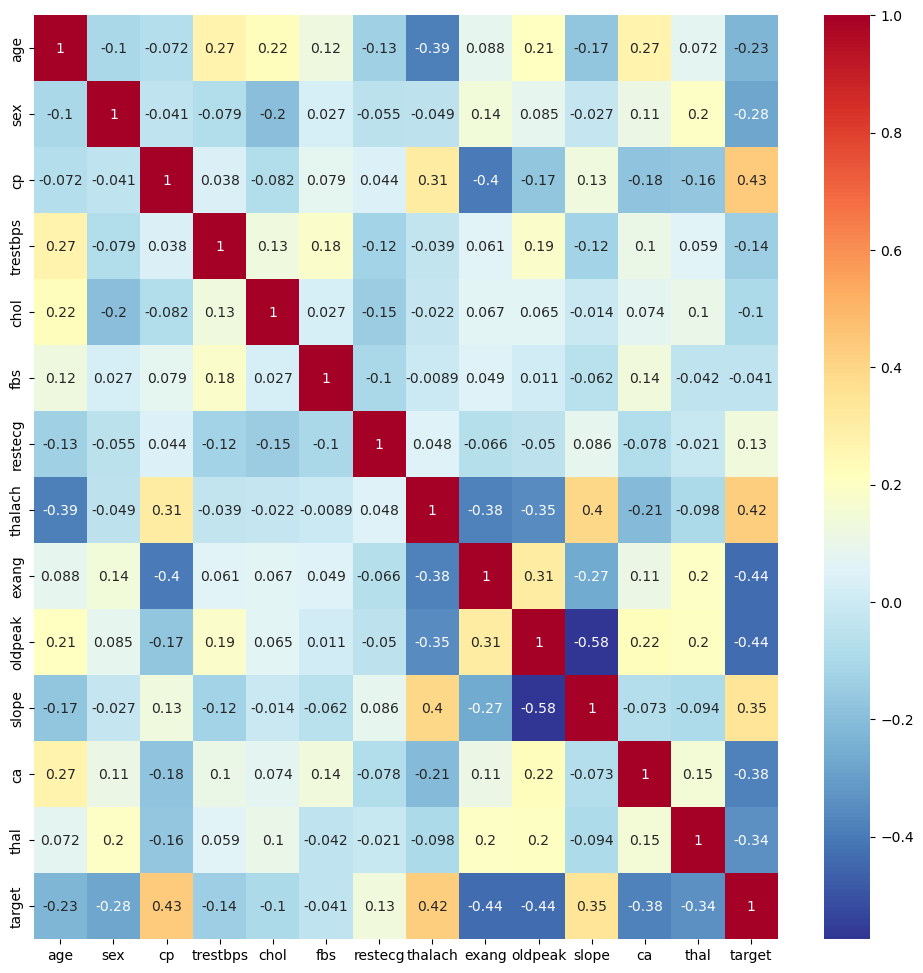

In [146]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='RdYlBu_r',annot=True)


    Age: displays the age of the individual.
    Sex: displays the gender of the individual using the following format :
    1 = male
    0 = female
    Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
    1 = typical angina
    2 = atypical angina
    3 = non — anginal pain
    4 = asymptotic
    Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
    Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
    Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
    If fasting blood sugar > 120mg/dl then : 1 (true)
    else : 0 (false)
    Resting ECG : displays resting electrocardiographic results
    0 = normal
    1 = having ST-T wave abnormality
    2 = left ventricular hyperthrophy
    Max heart rate achieved : displays the max heart rate achieved by an individual.
    Exercise induced angina :
    1 = yes
    0 = no
    ST depression induced by exercise relative to rest: displays the value which is an integer or float.
    Peak exercise ST segment :
    1 = upsloping
    2 = flat
    3 = downsloping
    Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
    Thal : displays the thalassemia :
    3 = normal
    6 = fixed defect
    7 = reversible defect
    Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
    0 = absence
    1, 2, 3, 4 = present.

In [147]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [148]:
df['restecg'].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

In [149]:
lablels=['normal','having ST-T wave abnormality','left ventricular hyperthrophy']

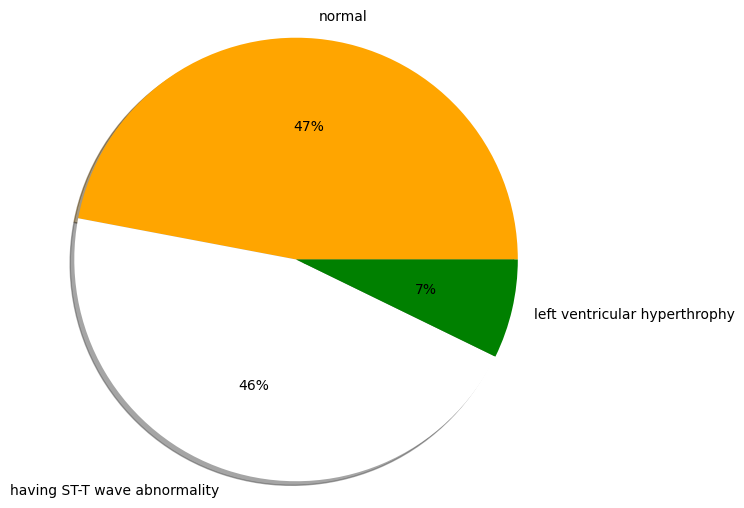

In [150]:
plt.pie(df['slope'].value_counts(),labels=lablels,radius=1.5,shadow=True,colors=['orange','white','green'],autopct='%.0f%%')
plt.show()

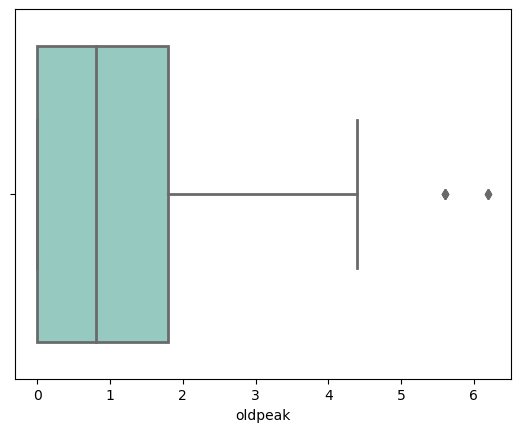

In [151]:
sns.boxplot(x='oldpeak',data=df,linewidth=2,palette="Set3")
plt.show()

# feature selection 

In [152]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [153]:
test = SelectKBest(score_func=f_classif, k=7)

In [154]:
X=df.drop('target',axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [155]:
y=df['target']
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [156]:
test.fit(X,y)

SelectKBest(k=7)

In [157]:

test.get_support(1)

array([ 2,  7,  8,  9, 10, 11, 12], dtype=int64)

In [158]:
features=test.feature_names_in_
features

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [159]:
scores=test.scores_


<AxesSubplot:>

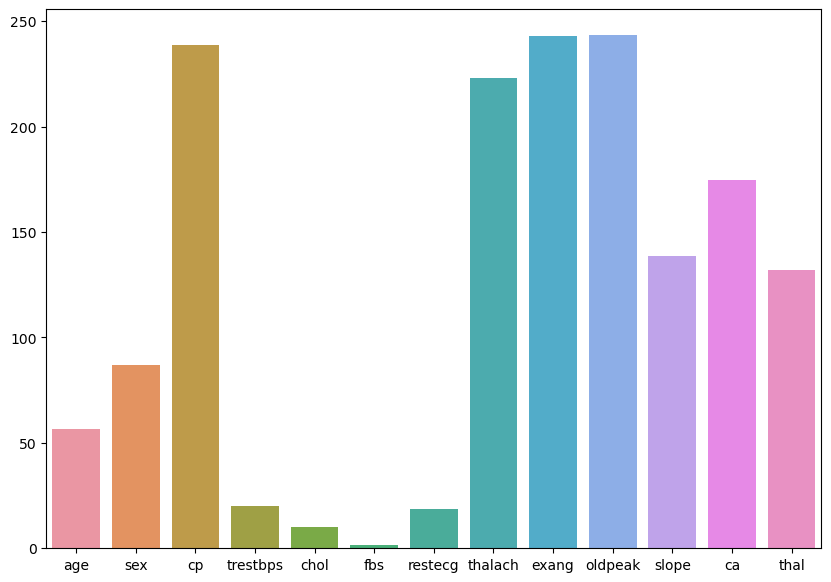

In [160]:
plt.figure(figsize=(10,7))
sns.barplot(x=features,y=scores)


In [161]:
features=['cp','thalach','exang','oldpeak','slope','ca','thal']

from IPython import display
display.Image("https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png")


# Splitting the Data into training and testing set

In [162]:
X=df[features]
X

,cp,thalach,exang,oldpeak,slope,ca,thal
0,0,168,0,1.0,2,2,3
1,0,155,1,3.1,0,0,3
2,0,125,1,2.6,0,0,3
3,0,161,0,0.0,2,1,3
4,0,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...
1020,1,164,1,0.0,2,0,2
1021,0,141,1,2.8,1,1,3
1022,0,118,1,1.0,1,1,2
1023,0,159,0,0.0,2,0,2


In [163]:
y=df['target']

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [165]:
X_train.shape

(717, 7)

In [166]:
X_test.shape

(308, 7)

# feature scaling

In [167]:
from sklearn.preprocessing import StandardScaler

In [168]:

scaler=StandardScaler()

In [169]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.93024335, -0.42994981, -0.73391185, ..., -2.32618565,
         2.13979297, -2.14702774],
       [ 2.02101541,  0.05427326, -0.73391185, ...,  0.97327056,
         1.1832895 , -0.52829074],
       [ 1.03726249,  0.75859772, -0.73391185, ...,  0.97327056,
        -0.72971743, -0.52829074],
       ...,
       [-0.93024335,  0.09829354,  1.36256145, ..., -0.67645755,
        -0.72971743, -0.52829074],
       [-0.93024335,  0.18633409,  1.36256145, ..., -0.67645755,
        -0.72971743, -0.52829074],
       [ 0.05350957, -1.31035538,  1.36256145, ..., -0.67645755,
         2.13979297, -2.14702774]])

In [170]:
X_test=scaler.transform(X_test)
X_test

array([[ 1.03726249, -2.32282178, -0.73391185, ..., -0.67645755,
         0.22678604,  1.09044627],
       [ 1.03726249,  0.18633409,  1.36256145, ..., -0.67645755,
        -0.72971743,  1.09044627],
       [-0.93024335, -1.44241621,  1.36256145, ..., -0.67645755,
        -0.72971743, -0.52829074],
       ...,
       [-0.93024335,  0.23035437,  1.36256145, ..., -2.32618565,
        -0.72971743,  1.09044627],
       [ 1.03726249,  0.97869911, -0.73391185, ...,  0.97327056,
        -0.72971743, -0.52829074],
       [ 1.03726249,  0.5825166 , -0.73391185, ..., -0.67645755,
         0.22678604,  1.09044627]])

In [171]:
X_train.shape

(717, 7)

In [172]:
X_test.shape

(308, 7)

# Model Selection

1.Logistic Regression

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [174]:
lr=LogisticRegression(solver='liblinear')

In [175]:
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [176]:
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [177]:
predict_proba1=lr.predict_proba(X_test)
predict_proba1

array([[0.77639124, 0.22360876],
       [0.52870091, 0.47129909],
       [0.95413846, 0.04586154],
       [0.90242667, 0.09757333],
       [0.69979951, 0.30020049],
       [0.2674366 , 0.7325634 ],
       [0.04327341, 0.95672659],
       [0.10549154, 0.89450846],
       [0.89712288, 0.10287712],
       [0.03252854, 0.96747146],
       [0.15617705, 0.84382295],
       [0.39400739, 0.60599261],
       [0.77179131, 0.22820869],
       [0.90159782, 0.09840218],
       [0.98983595, 0.01016405],
       [0.05354331, 0.94645669],
       [0.97906183, 0.02093817],
       [0.75210991, 0.24789009],
       [0.9468667 , 0.0531333 ],
       [0.56102667, 0.43897333],
       [0.43268071, 0.56731929],
       [0.64821876, 0.35178124],
       [0.03801254, 0.96198746],
       [0.03196859, 0.96803141],
       [0.79498821, 0.20501179],
       [0.98785006, 0.01214994],
       [0.15675141, 0.84324859],
       [0.73111704, 0.26888296],
       [0.07416044, 0.92583956],
       [0.07908798, 0.92091202],
       [0.

In [178]:
lr.intercept_

array([-0.1617971])

In [179]:
lr.coef_

array([[ 0.72098135,  0.40759735, -0.48664787, -0.75635548,  0.38415181,
        -0.7648292 , -0.62342322]])

In [180]:
test_score=lr.score(X_test,y_test)
test_score

0.8344155844155844

In [181]:
train_score=lr.score(X_train,y_train)
train_score

0.8396094839609484

In [182]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, predict_proba1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

Text(0, 0.5, 'True Positive rate')

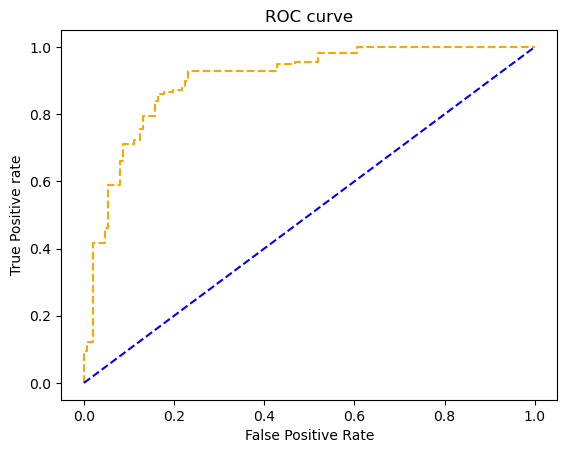

In [183]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

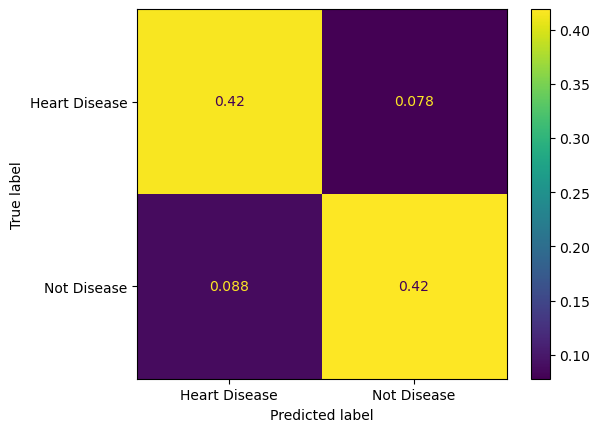

In [184]:

#Creating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Heart Disease','Not Disease'])
cmd.plot()

2.Support Vector Machine

In [185]:
from sklearn import svm

In [186]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [187]:
train_score=clf.score(X_train,y_train) #bias
train_score

0.8423988842398884

In [188]:
test_score=clf.score(X_test,y_test) #Variance
test_score

0.8311688311688312

In [189]:

y_pred=clf.predict(X_test)

In [190]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)

0.8311688311688312

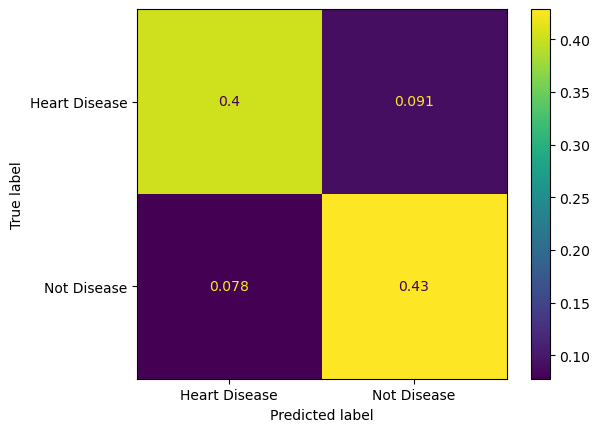

In [191]:
#Creating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Heart Disease','Not Disease'])
cmd.plot()

Decision Tree

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [194]:
y_pred=decision_tree.predict(X_test)

In [195]:
decision_tree.score(X_train,y_train)

1.0

In [196]:
accuracy_score(y_test,y_pred) # it is example of overfitting

0.961038961038961

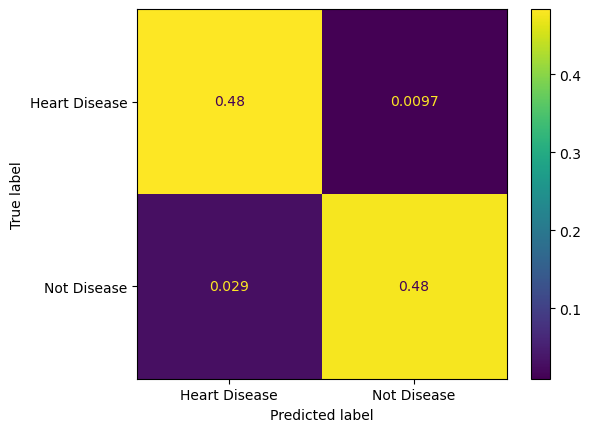

In [197]:
#Creating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Heart Disease','Not Disease'])
cmd.plot()

In [198]:

from sklearn.neighbors import KNeighborsClassifier

In [199]:
score=[]
n_neighbors=[]
for i in range(1,10):
    n_neighbors.append(i)
    knn=KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
    

Text(0.5, 1.0, 'Knn accuracy_score evaluation')

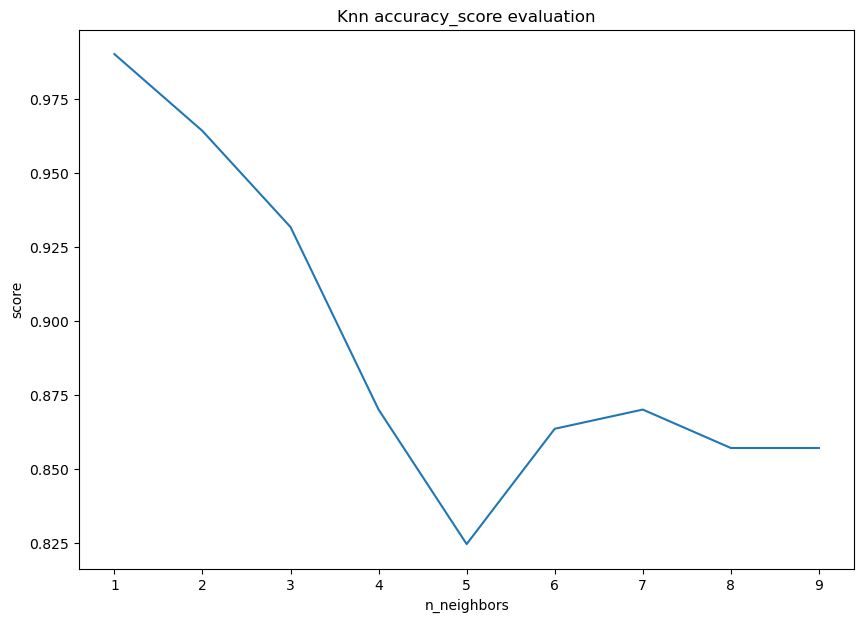

In [200]:
plt.figure(figsize=(10,7))
plt.plot(n_neighbors,score)
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.title('Knn accuracy_score evaluation')

In [201]:
knn=KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [202]:
knn.score(X_train,y_train)

0.9483960948396095

In [203]:
knn.score(X_test,y_test)

0.8701298701298701

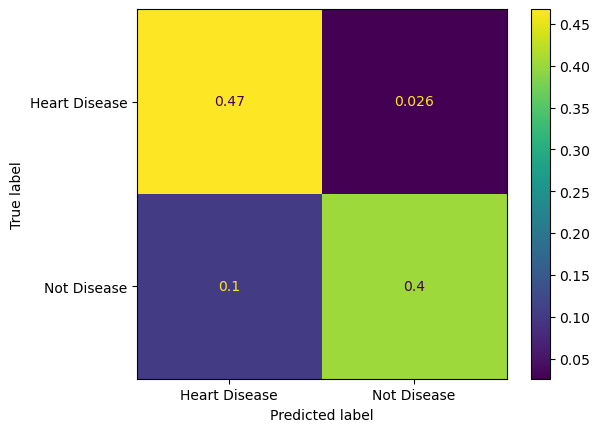

In [204]:
#Creating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Heart Disease','Not Disease'])
cmd.plot()

Using K elbow method we came on conc

In [205]:
score[4]

0.8246753246753247

Gradient Boosting Ensemble Learning Technique

In [206]:
from sklearn.ensemble import GradientBoostingClassifier


In [207]:
# Define Gradient Boosting Classifier with hyperparameters

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC

gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [208]:
# np.arange(100,455,344)

In [209]:
# np.arange(1,2,0.01)

In [210]:
y_pred=gbc.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [211]:
gbc.score(X_train,y_train)

0.9916317991631799

In [212]:
gbc.score(X_test,y_test)

0.9642857142857143

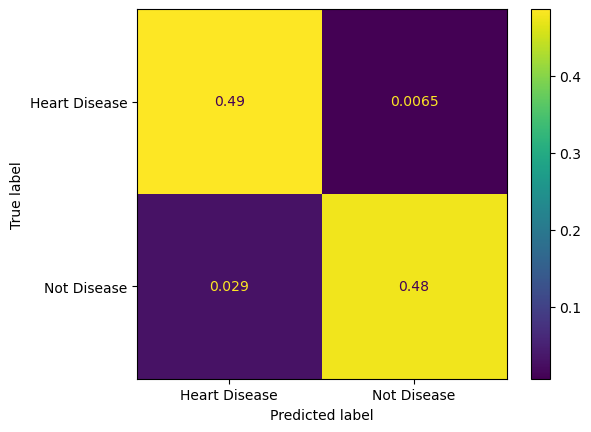

In [213]:
#Creating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Heart Disease','Not Disease'])
cmd.plot()

In [214]:
# from sklearn.model_selection import GridSearchCV

# # grid = {

# #     'learning_rate':np.arange(0.1,2,0.2),

# #     'n_estimators':np.arange(100,400,50)

# # }




In [215]:
# gb_cv = GridSearchCV(gb, grid, cv = 5)



In [216]:
print("Test Score:",gbc.score(X_test,y_test))

Test Score: 0.9642857142857143


In [217]:
import pickle
pickle.dump(gbc,open('heart_disease.pkl','wb'))

In [218]:
# load the model from disk
loaded_model = pickle.load(open('heart_disease.pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9642857142857143


In [219]:
! pip3 install pipreqs


Defaulting to user installation because normal site-packages is not writeable


In [220]:
!python3 -m  pipreqs.pipreqs

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [221]:
!pip3 freeze > requirements.txt